In [1]:
from tock import *

# Regular expressions

Regular expressions were invented by Stephen Kleene (pronounced clay-knee) in the 1950s. They came into practical use in the early days of Unix (`ed`, `grep`, and friends) and really took off through the programming language Perl.

Regular expressions have three operations: concatenation, union (∪ in the book, `|` in Unix), and Kleene star (`*`). The order of operations is star, then union, then concatenation. Use parentheses to change the order of operations, just as in arithmetic expressions.

Modern regular expression libraries have a lot of extensions. Some don't increase the number of languages recognized (`+`, `?`) and some do. We don't consider any of them here. On the other hand, for some reason, basic regular expressions in Unix don't have the union (`|`) operator; only so-called extended regular expressions have it.

Regular expressions in Tock use the same three operators and parentheses as Unix regular expressions; however, because a symbol can have more than one character, consecutive symbols must be separated by a space. Also, for the empty string, you must write `&`.

To create a regular expression in Tock (this one is from Example 1.56):

In [2]:
m = convert_regexp('(a b|a)*')

As the function name suggests, the regular expression is converted into a finite automaton, which you can view, as usual, as either a graph or a table.

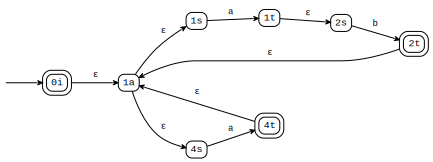

In [3]:
display_graph(m)

In [4]:
display_table(m)

,ε,a,b
@>0i,1a,,
1a,"{1s,4s}",,
1s,,1t,
1t,2s,,
2s,,,2t
@2t,1a,,
4s,,4t,
@4t,1a,,


The states are numbered according to the position in the regular expression they came from (so that listing them in alphabetical order is natural). The letter suffixes are explained below.

We can break the construction of the automaton down step by step. The `offset` option just says what number to begin numbering the states at, for clarity.

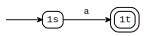

In [5]:
display_graph(convert_regexp("a", offset=1))

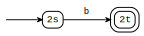

In [6]:
display_graph(convert_regexp("b", offset=2))

The suffixes `s` and `t` (for "source" and "target", I guess) are used for the state before and after each symbol. 

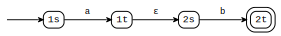

In [7]:
display_graph(convert_regexp("a b", offset=1))

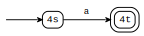

In [8]:
display_graph(convert_regexp("a", offset=4))

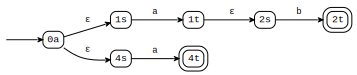

In [9]:
display_graph(convert_regexp("a b|a", offset=1))

The union operation adds an extra state at the beginning, with the suffix `a` (for "alternation", another name for the union operator).

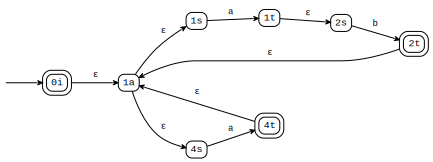

In [10]:
display_graph(convert_regexp("(a b|a)*"))

The Kleene star operation adds another extra state at the beginning, which has the suffix `i` (for "iteration", another name for the Kleene star).